<a href="https://colab.research.google.com/github/Coolinglass/Applied-Machine-Learning-Projects/blob/master/Time_series_forecasting_Energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Time series models for forecasting energy consumption**

Forecasting energy consumption is vital for optimizing energy
generation, enhancing planning, operation, management, and
efficient use of energy systems, and boosting the energy market.
In this project, we will utilize historical data of monthly electricity
consumption to forecast future demand.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the CSV file that contains the consumption of energy data per Month
data = pd.read_csv("/content/drive/MyDrive/Analytics Vidhya/Time Series Forecasting using Python- V1/assignemnt 1/energy consumption.csv")

In [4]:
#Data exploration: Understanding the values in the data
data.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [5]:
# Checking the size of the data
data.shape

(969, 2)

In [6]:
# Checking our dataframe for any null values & also checking the object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          969 non-null    object 
 1   ENERGY_INDEX  969 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.3+ KB


In [7]:
# Using our in-built Pandas library to Convert our Date from an float object to a date time format
# This is done so that we can perform time-series analysis
data['DATE'] = pd.to_datetime(data['DATE'],format='%m/%Y')

data.index = data['DATE']

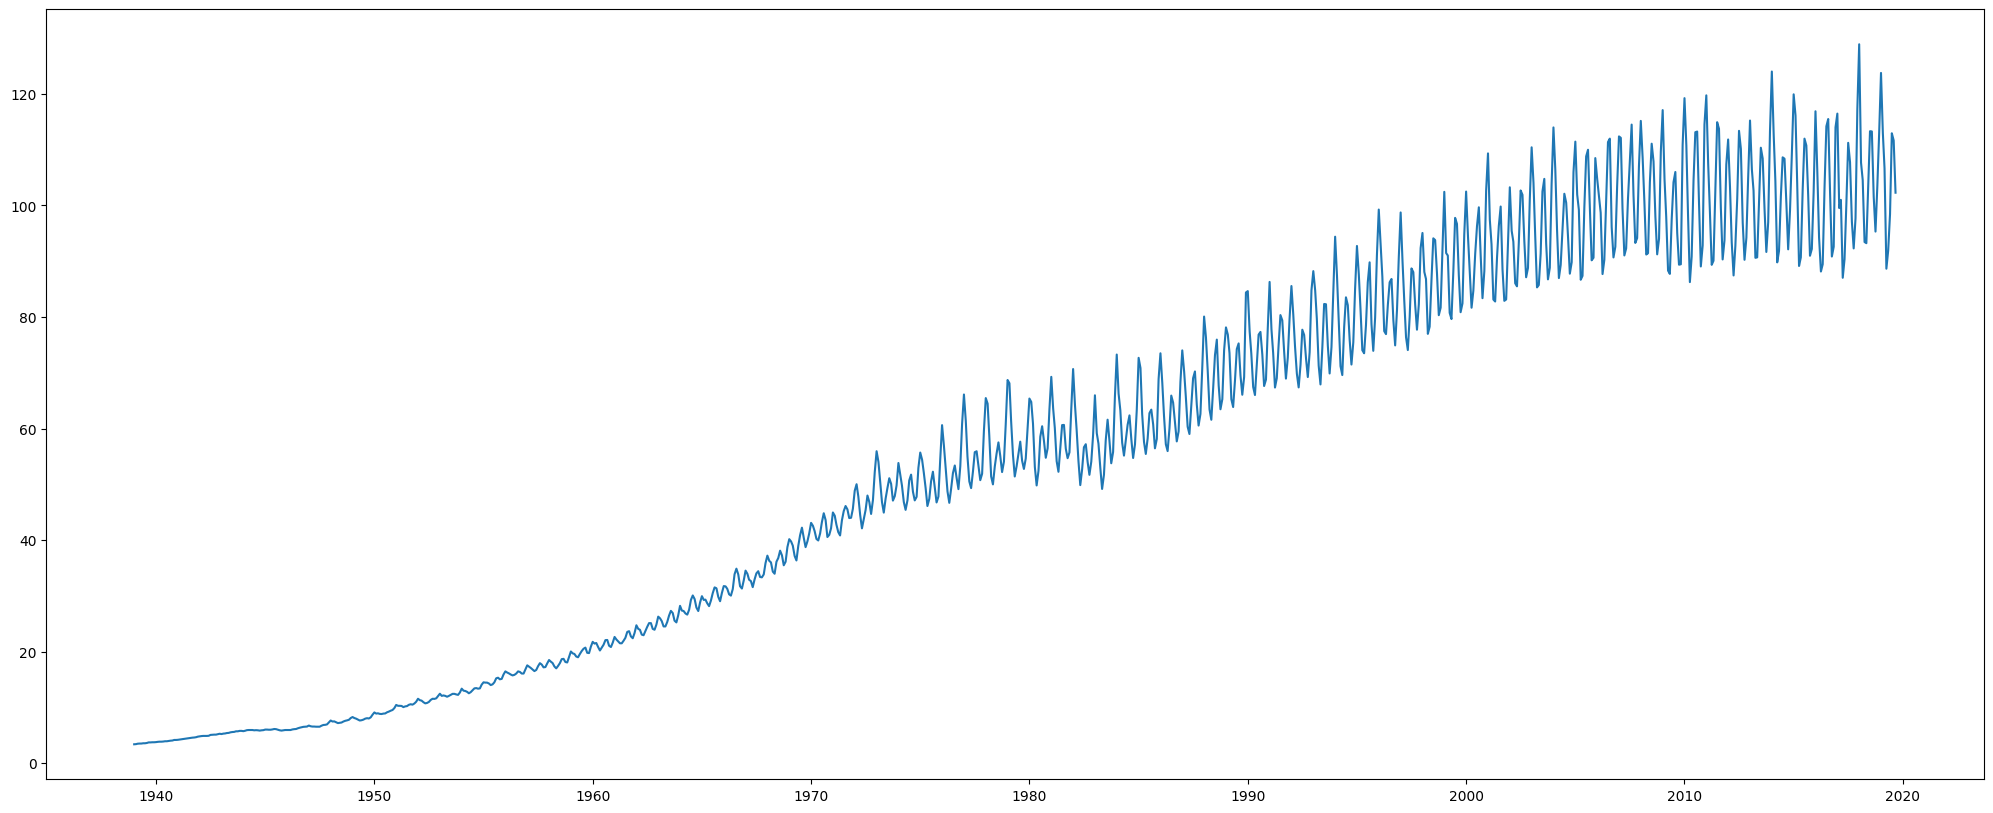

In [8]:
#EDA to briefly look at if our Data has any patterns.
plt.subplots(figsize=(25, 10))
plt.plot(data["DATE"], data["ENERGY_INDEX"])
plt.show()

Insights: From our EDA we can say that the data has generally increasing trend which makes sense as the general energy cost has increased over the years. Also, we can see the data has some seasonality attached to it.

 Splitting our data into training set and our validation set. Considering it is a time series model, we will not be able to use our train_test split function as the sequence of the time is an important factor and hence we will be slicing the data to create our own training and validation sets respectively.

In [9]:

train_data = data[0:678]
valid_data =data[678:969]

In [10]:
#Reviewing our train data &  Validation data to make sure slicing has been performed appropriately.
valid_data, train_data

(                 DATE  ENERGY_INDEX
 DATE                               
 1995-07-01 1995-07-01       86.2425
 1995-08-01 1995-08-01       89.8063
 1995-09-01 1995-09-01       78.7442
 1995-10-01 1995-10-01       73.9353
 1995-11-01 1995-11-01       79.8903
 ...               ...           ...
 2019-05-01 2019-05-01       91.9046
 2019-06-01 2019-06-01       98.4397
 2019-07-01 2019-07-01      112.9469
 2019-08-01 2019-08-01      111.6645
 2019-09-01 2019-09-01      102.2911
 
 [291 rows x 2 columns],
                  DATE  ENERGY_INDEX
 DATE                               
 1939-01-01 1939-01-01        3.3842
 1939-02-01 1939-02-01        3.4100
 1939-03-01 1939-03-01        3.4875
 1939-04-01 1939-04-01        3.5133
 1939-05-01 1939-05-01        3.5133
 ...               ...           ...
 1995-02-01 1995-02-01       87.6670
 1995-03-01 1995-03-01       81.5205
 1995-04-01 1995-04-01       74.0457
 1995-05-01 1995-05-01       73.5003
 1995-06-01 1995-06-01       78.5503
 
 [678 row

In [11]:
# Loading the exponential smoothing methods from statsmodels to perform Triple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [12]:
#instatiating our model and assinging learning rate values for levels, slope(trend) and seasonality components.
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.15, smoothing_slope=0.1, smoothing_seasonal=0.45) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data))

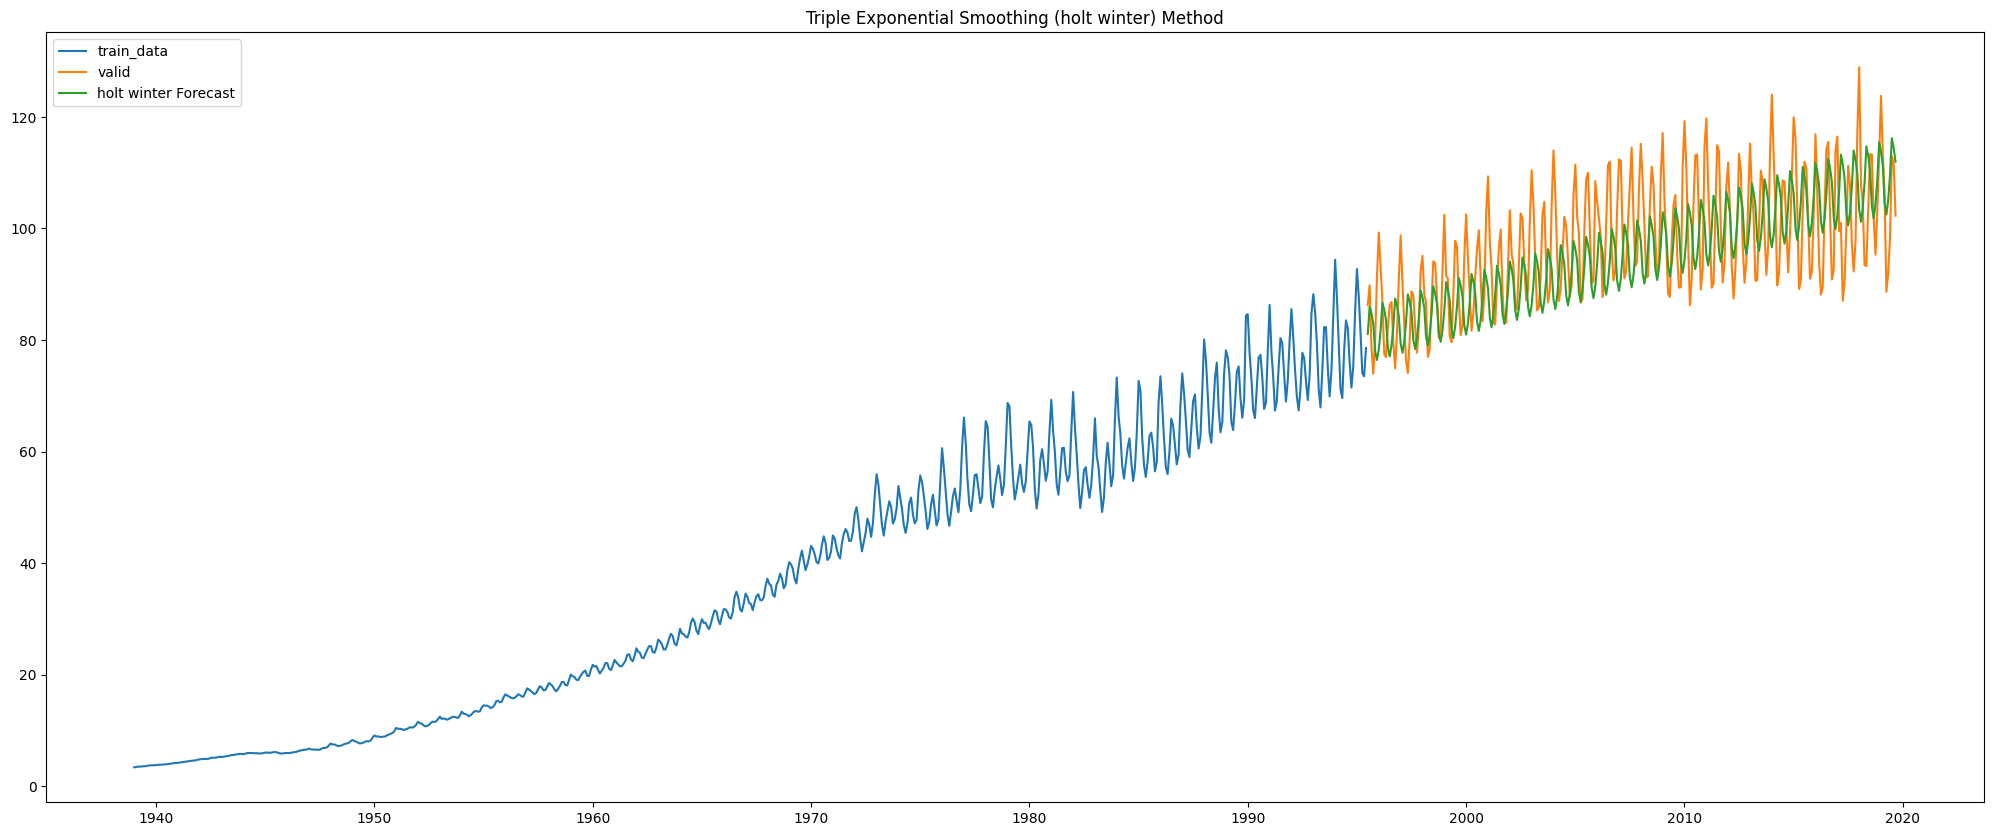

In [13]:
#Plotting graph to understand how our predicted dates compares to the actual data.
plt.figure(figsize=(25,10))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [14]:
# calculating RMSE
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 10.476403540240506


In [15]:
model.params

{'smoothing_level': 0.15,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.45,
 'damping_trend': nan,
 'initial_level': 3.422173162534319,
 'initial_trend': 0.035273627854544874,
 'initial_seasons': array([0.97800546, 0.98158201, 0.9838312 , 0.98293156, 0.97570631,
        0.97790002, 0.97570734]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [16]:
#Creating our test datasets to run predictions on our test data sets
Test_Data = pd.date_range(start="2019-10-19", periods=36, freq='1M')
Test_Data

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [17]:
Test_Data_pred = pd.DataFrame(Test_Data, columns = (['Date']))


In [18]:
Test_Data_pred.head()

,Date
0,2019-10-31
1,2019-11-30
2,2019-12-31
3,2020-01-31
4,2020-02-29


In [19]:
Test_Data_pred['Date'] = pd.to_datetime(Test_Data_pred['Date'],format='%Y-%m-%d')

Test_Data_pred.index = Test_Data_pred['Date']

In [20]:
#Generating predictions for our test data set
model = ExponentialSmoothing(np.asarray(data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.45) #

Test_Data_pred['Holt_Winter'] = fit1.forecast(len(Test_Data_pred))

In [21]:
Test_Data

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [22]:
Test_Data_pred.head()

,Date,Holt_Winter
Date,,
2019-10-31,2019-10-31,108.678858
2019-11-30,2019-11-30,96.426405
2019-12-31,2019-12-31,96.622330
2020-01-31,2020-01-31,99.578641
2020-02-29,2020-02-29,108.410125


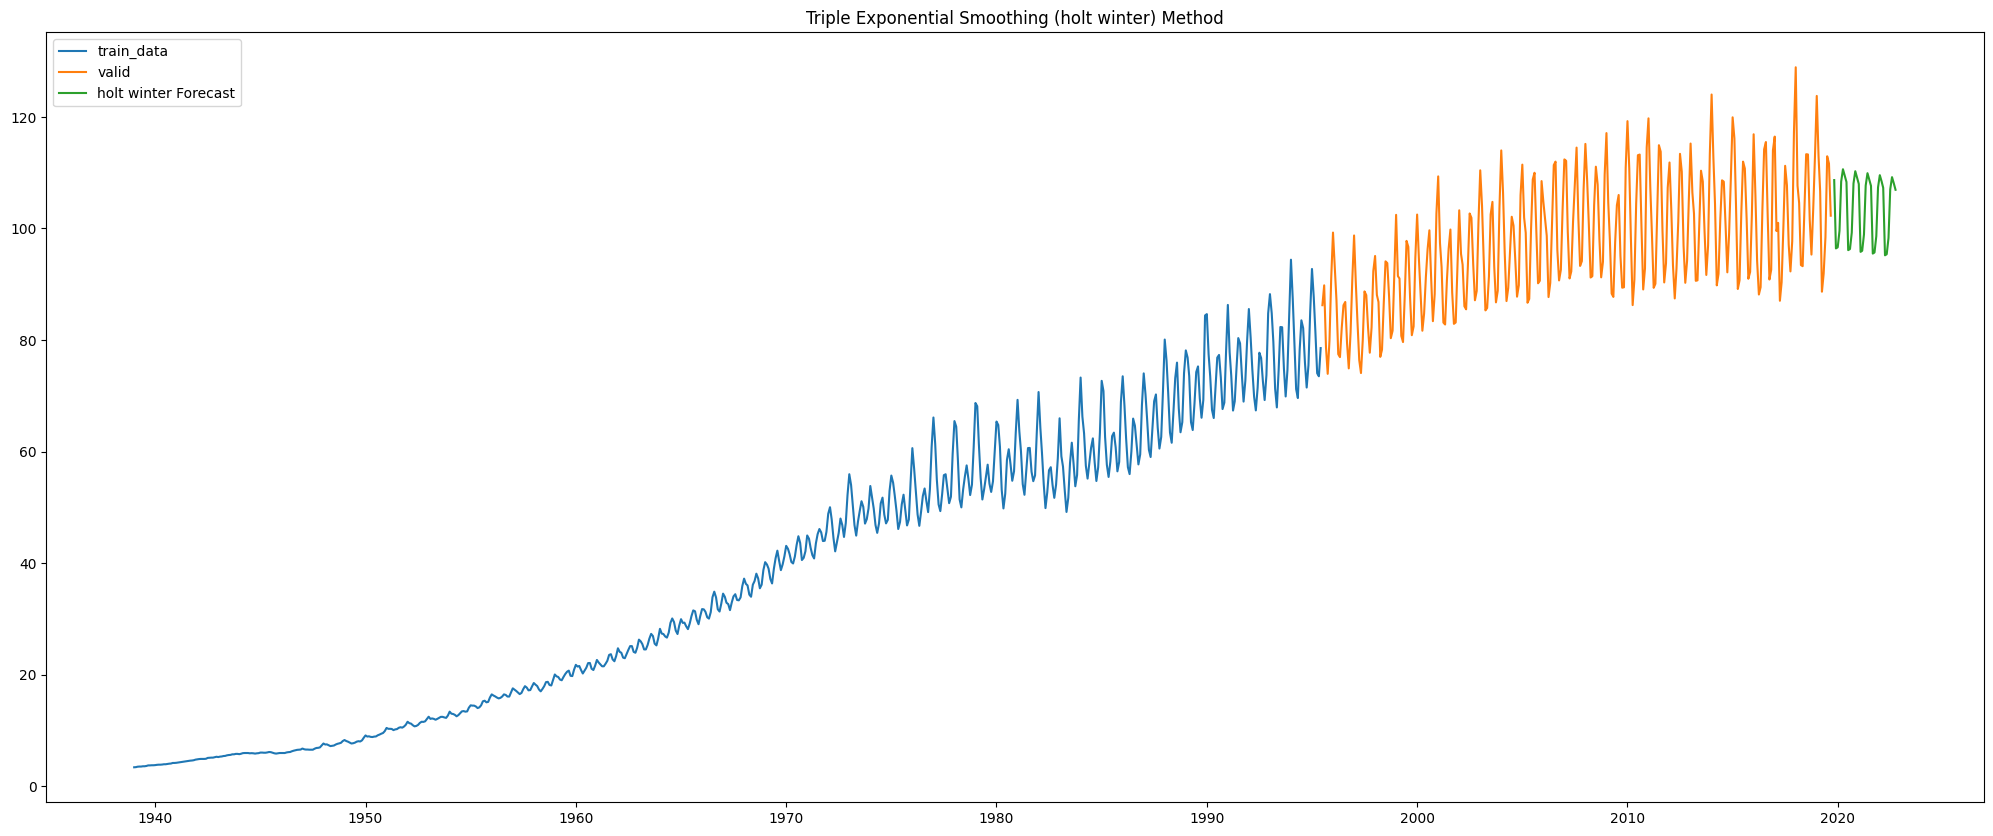

In [23]:
plt.figure(figsize=(25,10))
plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(Test_Data_pred['Date'],Test_Data_pred['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [24]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

Performing statistical test to confirm that our series has a trend attached to it and it is non-stationary. First statistical test would be to do augmented dickey-fuller test

In [25]:
def adf_test(timeseries):

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
#Identifying our test statistics
adf_test(train_data['ENERGY_INDEX'])

Results of Dickey-Fuller Test:
Test Statistic                   1.672144
p-value                          0.998059
#Lags Used                      13.000000
Number of Observations Used    664.000000
Critical Value (1%)             -3.440237
Critical Value (5%)             -2.865903
Critical Value (10%)            -2.569093
dtype: float64


The Test Statistic is 1.672144, which is greater than any of the critical values.

p-value is 0.998059

The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [27]:
# Running KPSS test for additional confirmation that the series is non-stationary.
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [28]:
kpss_test(train_data['ENERGY_INDEX'])

Results of KPSS Test:
Test Statistic            3.851663
p-value                   0.010000
#Lags Used               17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-27-400750231f17>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative. Hence we conclude series is non-stationary

In [106]:
#Creating a stationary series to understand differencing.
train_data['count_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

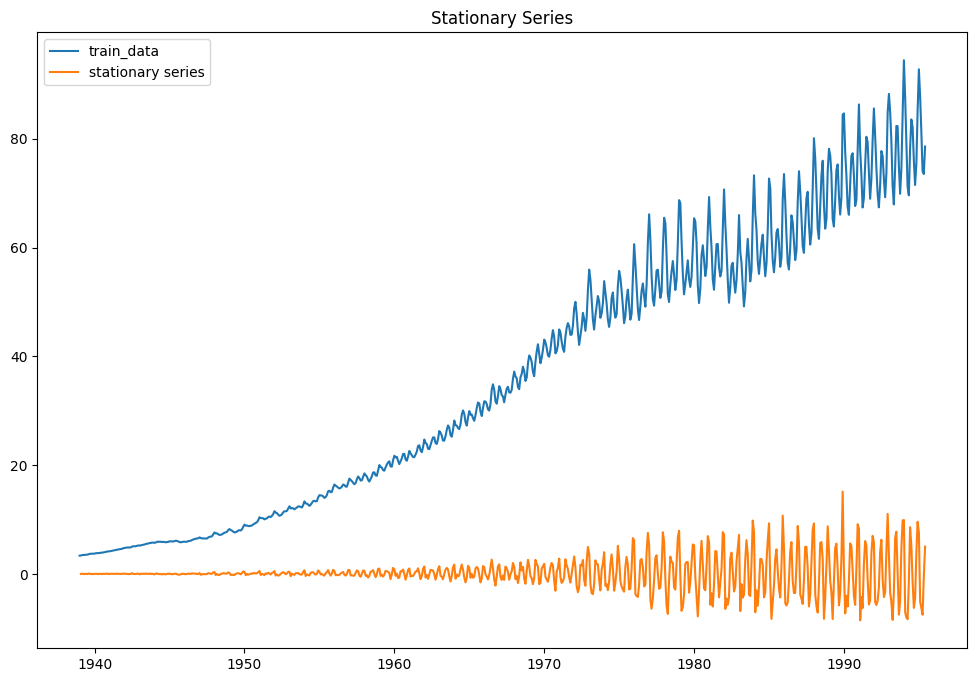

In [107]:
#Visualzing the difference needed for a series to be stationary
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['count_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [108]:
train_data['count_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(1)

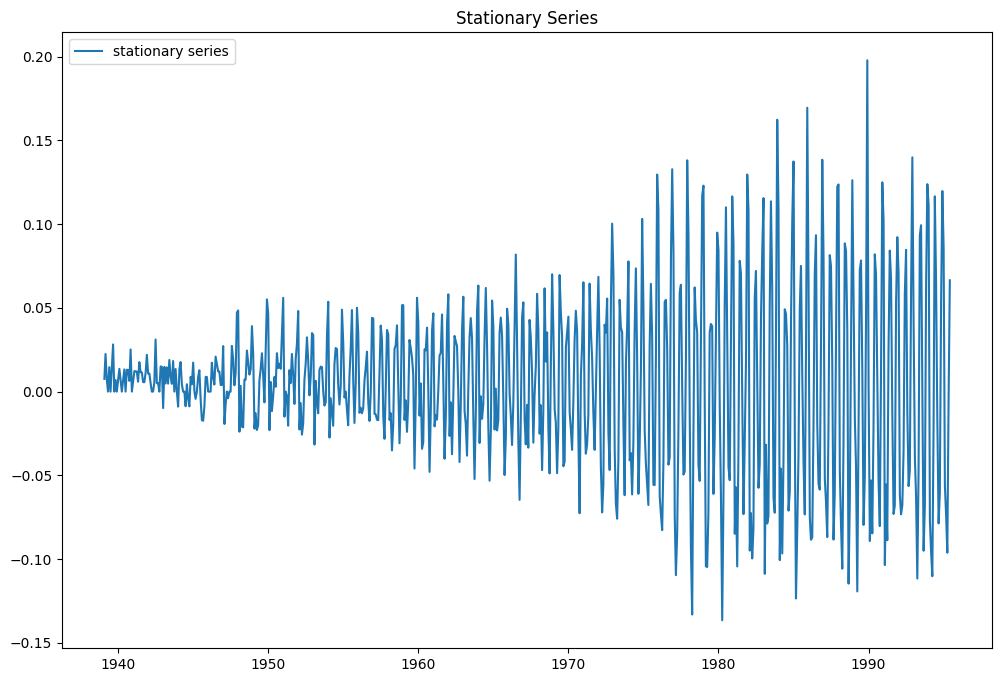

In [109]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 2500x1200 with 0 Axes>

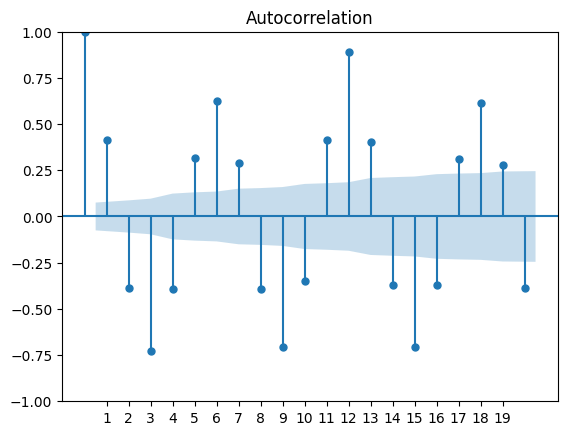

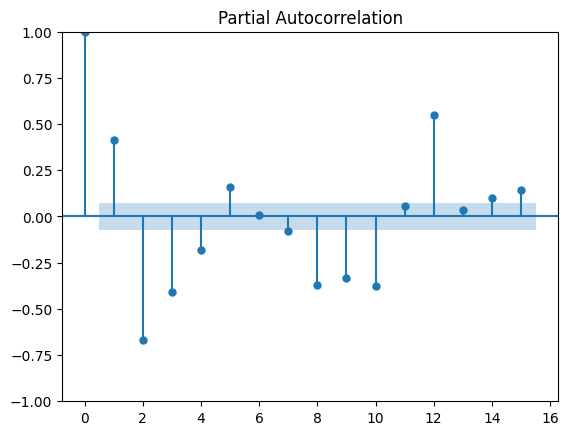

In [110]:
#plotting ACF and PCF plots based on the log value. ACF plot lags clearly shows a seasonal trend
plt.figure(figsize=(25,12))
plot_acf(train_data['count_log_diff'].dropna(), lags=20)

plt.xticks(range(1,20,1))
plot_pacf(train_data['count_log_diff'].dropna(), lags=15)
plt.show()

In [35]:
from statsmodels.tsa.statespace import sarimax

In [36]:
train_data['count_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(7)

In [37]:
train_data['count_log_diff'].head(10)

,count_log_diff
DATE,
1939-01-01,NaN
1939-02-01,NaN
1939-03-01,NaN
1939-04-01,NaN
1939-05-01,NaN
1939-06-01,NaN
1939-07-01,NaN
1939-08-01,0.066444
1939-09-01,0.087011


<Figure size 2500x1200 with 0 Axes>

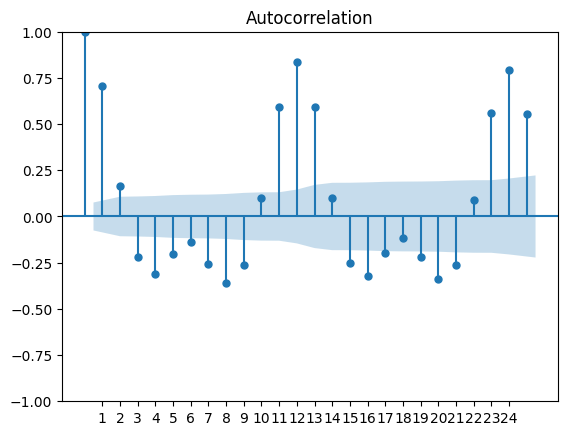

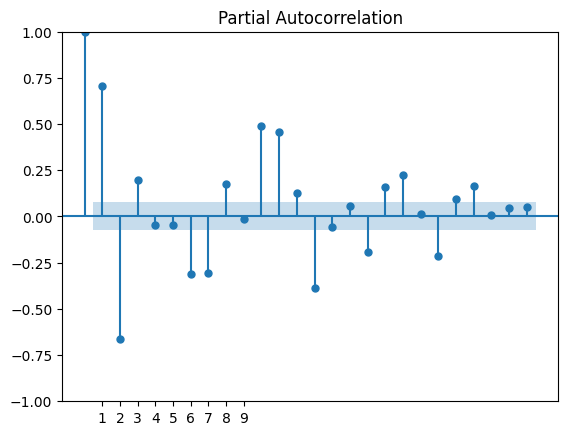

In [94]:
plt.figure(figsize=(25,12))
plot_acf(train_data['count_log_diff'].dropna(), lags=25)

plt.xticks(range(1,25,1))
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.xticks(range(1,10,1))
plt.show()

In [39]:
valid_data.head

<bound method NDFrame.head of                  DATE  ENERGY_INDEX  Holt_Winter
DATE                                            
1995-07-01 1995-07-01       86.2425    81.079289
1995-08-01 1995-08-01       89.8063    85.960281
1995-09-01 1995-09-01       78.7442    84.721281
1995-10-01 1995-10-01       73.9353    82.886508
1995-11-01 1995-11-01       79.8903    77.997123
...               ...           ...          ...
2019-05-01 2019-05-01       91.9046   105.001659
2019-06-01 2019-06-01       98.4397   109.628802
2019-07-01 2019-07-01      112.9469   116.191391
2019-08-01 2019-08-01      111.6645   114.480185
2019-09-01 2019-09-01      102.2911   111.965346

[291 rows x 3 columns]>

In [137]:
# fit model using Sarmix method with parameters based on the above ACF and PCF plots along with seasonality component of 6.
model = sarimax.SARIMAX(train_data['count_log'], seasonal_order=(2,1,1,6), order=(2,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="1995-07-01", end="2019-09-01", dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [133]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

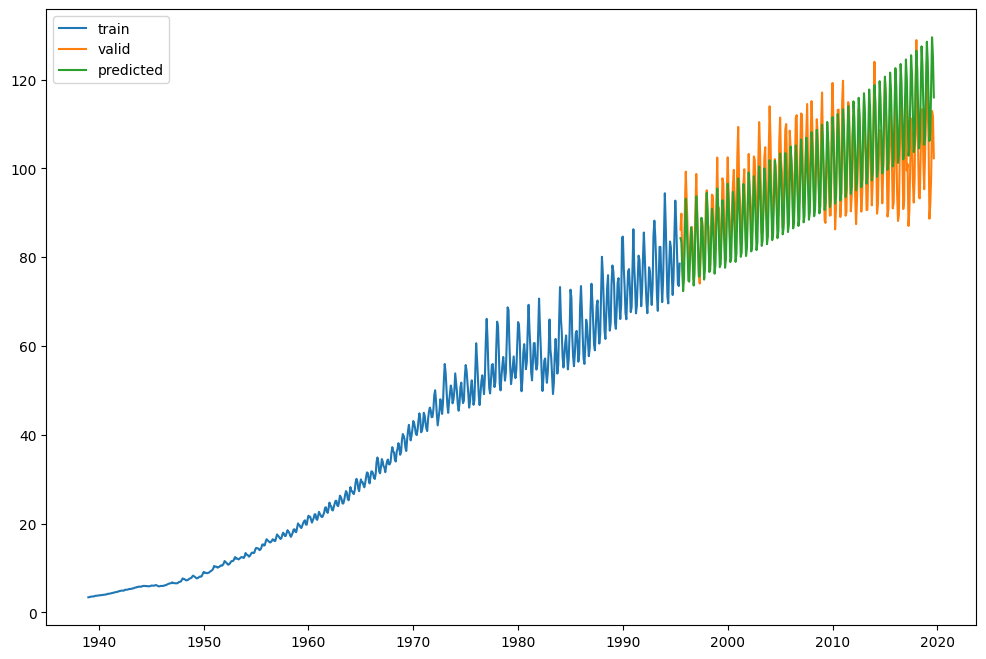

In [134]:
plt.figure(figsize=(12,8))

plt.plot(train_data['ENERGY_INDEX'],  label='train')
plt.plot(valid_data['ENERGY_INDEX'],  label='valid')
plt.plot(valid_data['SARIMA'],  label='predicted')
plt.legend(loc='best')
plt.show()

In [136]:
# calculating RMSE
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 6.7575420836328455
